<a href="https://colab.research.google.com/github/CecinestpasJonatan/MachineaLearningIntroNotebook/blob/main/MachineLearningIntro_1_Classical_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Now it's time to jump ahead to more modern methods, and change the task we want to perform from estimating a certain quantity (regression) to separating the data into different groups (classification).

Imaging that we have some 2-dimensional data, which are generated from two different classes:

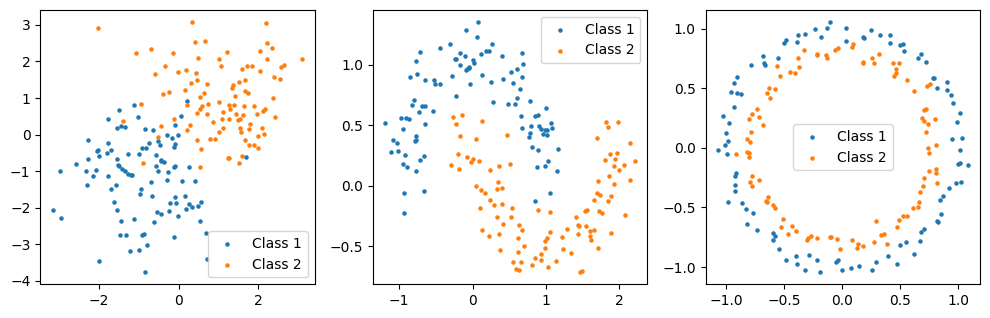

In [ ]:
#@title Code
from sklearn.datasets import make_blobs, make_moons, make_circles
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output
import numpy as np

n_points = 200

X_blob, y_blob = make_blobs(n_samples=n_points, centers=[[-1,-1.],[1,1]], n_features=2, random_state=1337)
X_moon, y_moon = make_moons(n_samples=n_points,  random_state=1337, noise=0.15)
X_circles, y_circles = make_circles(n_samples=n_points, random_state=1337, noise=0.04)

data = [[X_blob, y_blob],[X_moon, y_moon],[X_circles, y_circles]]

fig, axs = plt.subplots(ncols=3, figsize=(10,30))

for data_fig, ax in zip(data, axs):
  X = data_fig[0]
  y = data_fig[1]
  ax.scatter(X[y==0, 0], X[y==0, 1], s=5)
  ax.scatter(X[y==1, 0], X[y==1, 1], s=5)
  ax.legend(["Class 1", "Class 2"])
  #ax.set(aspect='equal')
  ax.set_box_aspect(1)

plt.tight_layout()

Now our task is to classify this data so that they belong to the correct class. That is, our model must be able to classify the maximum number or values as belonging to the correct class while minimizing the amount of data points which are categorized as beloning to the wrong class.

One method would be to compare each sample to a number of the closest samples, and classifying the data as beloning to the class which has the most samples beloning to a certain class in this selection of data. Example as per Wikipedia:

![image.gif](https://upload.wikimedia.org/wikipedia/commons/7/78/KNN_decision_surface_animation.gif)

Try it out in our synthetic data sets to see how the dicision boundary changes with the number of neighbors used for classification.

In [ ]:
#@title Code
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier

def KNN_clf(neighbors=1):
  fig, axs = plt.subplots(ncols=3, figsize=(10,30))
  for data_fig, ax in zip(data, axs):
    X = data_fig[0]
    y = data_fig[1]
    clf = KNeighborsClassifier(n_neighbors=neighbors)
    clf.fit(X, y)

    ax.scatter(X[y==0, 0], X[y==0, 1], s=5)
    ax.scatter(X[y==1, 0], X[y==1, 1], s=5)

    y_pred = clf.predict(X)
    y_incorrect = np.argwhere(y != y_pred)

    ax.scatter(X[y_incorrect, 0], X[y_incorrect, 1], c='r', s=5)
    ax.legend(["Class 1", "Class 2", "Incorrect"])

    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
            **common_params,
            response_method="predict",
            plot_method="pcolormesh",
            alpha=0.3,
        )
    ax.set_box_aspect(1)

  plt.tight_layout
  plt.show()

output = widgets.Output()
clear_output()

widgets.interact(KNN_clf, neighbors=widgets.IntSlider(value=5, min=2, max=15))
display(output)


interactive(children=(IntSlider(value=5, description='neighbors', max=15, min=2), Output()), _dom_classes=('wi…

Output()

This method is called K-nearest neighbors classifier, and requires no explicit training. Instead, classification is done by looking up the datapoints which are the closest the samples to be classified. While often very useful, it requires that all "training" data is stored for classifying new data points, and classifying new data points requires the model to search through all training data to find the closest data points, which can become very slow as the data set grows into the millions.

One potentially more robust method would be to find a line which can be used to divide the dataset into the different classes. However, a lot of datasets would be impossible to divide using a straight line normally, as seen in our previous examples. But here's the trick: It might be able to divide it using a straight line if the data has been transformed using some form of operation. This is commonly used trick, called the 'kernel trick', is used to transform the data, potenitally to higher dimensional representation, where the partition and classification can be performed linearly. After this decision boundary has been found the model is transformed back into the original data space, making this a very powerful method for finding complex partitions of a data set.

In the next example 'linear' means that a dicision boundary is drawn straight through the dataset without any transformation. 'poly' means that the data is transformed using a third degree polynomial, and 'rbf' means that an exponential transform is used.

In [ ]:
#@title Code
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay

def SVC_clf(kernel='linear', C=1, margin=False):

  fig, axs = plt.subplots(ncols=3, figsize=(10,30))
  for data_fig, ax in zip(data, axs):
    X = data_fig[0]
    y = data_fig[1]
    clf = svm.SVC(kernel=kernel, C=C)
    clf.fit(X, y)

    ax.scatter(X[y==0, 0], X[y==0, 1], s=5)
    ax.scatter(X[y==1, 0], X[y==1, 1], s=5)

    y_pred = clf.predict(X)
    y_incorrect = np.argwhere(y != y_pred)

    ax.scatter(X[y_incorrect, 0], X[y_incorrect, 1], c='r', s=5)
    ax.legend(["Class 1", "Class 2", "Incorrect"])

    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
            **common_params,
            response_method="predict",
            plot_method="pcolormesh",
            alpha=0.3,
        )
    if margin:
      DecisionBoundaryDisplay.from_estimator(
          **common_params,
          response_method="decision_function",
          plot_method="contour",
          levels=[-1, 0, 1],
          colors=["k", "k", "k"],
          linestyles=["--", "-", "--"],
      )

    ax.set_box_aspect(1)

  plt.tight_layout
  plt.show()

output = widgets.Output()
clear_output()

widgets.interact(SVC_clf, kernel=widgets.RadioButtons(options=['linear', 'poly','rbf'], description='Kernel type:'), C=widgets.FloatLogSlider(value=1, base=10, min=-4, max=2, step=0.2),
    margin=widgets.Checkbox(
    value=False,
    description='Show margins',
    disabled=False))

display(output)

interactive(children=(RadioButtons(description='Kernel type:', options=('linear', 'poly', 'rbf'), value='linea…

Output()

This method of machine learning is called Support Vector Machines. This algorithm tries to find a dicision boundary between classes which minimizes the incorrectly classified data, as well as maximizing the distance between the boundary and incorrectly classified samples. These samples that lies on the edge of this margin between partitions are called support vectors. Here we see that it's not possible to find a straight line which partitions the data into two parts without incorrectly classify any data, but using kernel transformations it is possible to partition the data accurately. The most common kernel transformation is called 'rbf', or 'radial basis function', which can be seen as a infinite dimensional polynomial transformation. This function defines the distance between two data points as:

![image.png](https://wikimedia.org/api/rest_v1/media/math/render/svg/c16fd6c515412f96a57506103896178d0e8af77d)

The 'C' parameter determines how much the algorithm will 'punish' incorretly labeled data, meaning that a high 'C' value will nudge the algorithm towards finding a more complex decision boundary.

One problem with this algorithm is that it does not scale well with increasing data samples and dimensions, as well as needing to decide what type of kernel to use for data transformations with no flexibility for different parts of the dataset. Evidently, a more expressive method which can approximate functions for different parts of the dataset separably is need.


One method of partitioning the dataset into different parts is to build a decision tree. Using this method the model tries to learn different hierarchies of partitions of the dataset which can be used in the end to classify different data samples. One example per wikipedia in how such a tree can look like:

![titanic.png](https://upload.wikimedia.org/wikipedia/commons/e/eb/Decision_Tree.jpg)

'sibsp' here referes to the number of sibling aboar the Titanic. Here the algorithm has learned that the most important factor in surviving is whether you are male or female. Then, if you are male, the most important factor is your age, and after that the most important factor is the number of siblings aboard. Note that this hierarchy is dependent on the constraints in the depth of the tree, how many datapoints are needed to split a tree, and how many datapoints are needed to become a leaf point.

The decision tree method, as we see, uses a number of parameters to decide how to build the descision tree, where the max_depth parameter decides the maximum level of decision that the tree can consist of, while min_split and min_leaf decides how many data samples are needed for a decision to be made at each node and lead, respectively. Increasing the maximum depth will enable the decision tree to model more complex data, while increasing the min_split and min_leaf values will make the classification "safe", i.e. the algorithm will look at larger clusters of data instead of single data points.

In [ ]:
#@title Code
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

def Tree_clf(max_depth=None, min_samples_split=2, min_samples_leaf=1):
  fig, axs = plt.subplots(ncols=3, figsize=(10,30))
  for data_fig, ax in zip(data, axs):
    X = data_fig[0]
    y = data_fig[1]
    clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
    clf.fit(X, y)

    ax.scatter(X[y==0, 0], X[y==0, 1], s=5)
    ax.scatter(X[y==1, 0], X[y==1, 1], s=5)

    y_pred = clf.predict(X)
    y_incorrect = np.argwhere(y != y_pred)

    ax.scatter(X[y_incorrect, 0], X[y_incorrect, 1], c='r', s=5)
    ax.legend(["Class 1", "Class 2", "Incorrect"])

    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
            **common_params,
            response_method="predict",
            plot_method="pcolormesh",
            alpha=0.3,
        )
    ax.set_box_aspect(1)

  plt.tight_layout
  plt.show()

output = widgets.Output()
clear_output()

widgets.interact(Tree_clf, max_depth=widgets.IntSlider(value=5, min=0, max=50, description='Max_depth'),
                 min_samples_split=widgets.IntSlider(value=2, min=2, max=50, description='Min_split:'),
                 min_samples_leaf=widgets.IntSlider(value=1, min=1, max=50, description='Min_leaf'),)
display(output)


interactive(children=(IntSlider(value=5, description='Max_depth', max=50), IntSlider(value=2, description='Min…

Output()

But what if we want to both partition the dataset into different parts, and still use some form of function to models the individual parts of the dataset?

One way of expressing arbitrary functions is to use mulitple layers of individual estimators, which are combined to produce the final estimation. These estimators are able to partition the dataset into subfields where they contribute to the esimation if active, otherwise they will remain inactive. This allows for non-linear estimation while enabling training gradually by comparing individual or a subset of samples to the correct data:

In [ ]:
#@title Code

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.base import clone
import warnings
warnings.filterwarnings('ignore')

def get_activations(clf, X, y):
  l1 = (clf.coefs_[0].T@X.T).T + clf.intercepts_[0].T
  l1_mask = l1 > 0
  l1_act = l1 * l1_mask

  l2 = (clf.coefs_[1].T@l1_act.T).T + clf.intercepts_[1]
  l2_mask = l2 > 0
  l2_act = l2 * l2_mask

  output = (clf.coefs_[2].T@l2_act.T).T + clf.intercepts_[2]
  return l1_act, l2_act, output

def MLP_clf(layer1=10, layer2=10, learning_rate=0.05, iterations=100):
  fig, axs = plt.subplots(ncols=3, figsize=(10,30))
  clf_base = MLPClassifier(hidden_layer_sizes=(layer1, layer2), learning_rate_init=learning_rate,
                      learning_rate='invscaling', random_state=1337, warm_start=True,
                      activation='relu', max_iter=iterations)
  clf_list = [clone(clf_base), clone(clf_base), clone(clf_base)]
  for data_fig, ax, clf in zip(data, axs, clf_list):
    X = data_fig[0]
    y = data_fig[1]
    clf.fit(X, y)

    ax.scatter(X[y==0, 0], X[y==0, 1], s=5)
    ax.scatter(X[y==1, 0], X[y==1, 1], s=5)

    y_pred = clf.predict(X)
    y_incorrect = np.argwhere(y != y_pred)

    ax.scatter(X[y_incorrect, 0], X[y_incorrect, 1], c='r', s=5)
    ax.legend(["Class 1", "Class 2", "Incorrect"])

    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
                **common_params,
                response_method="predict",
                plot_method="pcolormesh",
                alpha=0.3,)
    ax.set_box_aspect(1)

  plt.tight_layout
  plt.show()

output = widgets.Output()
clear_output()

widgets.interact(MLP_clf, layer1=widgets.IntSlider(value=10, min=1, max=50),
                 layer2=widgets.IntSlider(value=10, min=1, max=50),
                 learning_rate=widgets.FloatLogSlider(value=0.05, base=10, min=-3, max=0, step=0.2),
                 iterations=widgets.IntSlider(value=200, min=1, max=500),)
display(output)


interactive(children=(IntSlider(value=10, description='layer1', max=50, min=1), IntSlider(value=10, descriptio…

Output()

This is exactly what neural networks do! The architecture of the network allows for extremely powerful estimations, while being relatively "cheap" to train. The power of neural networks comes from the fact that a neuron can be "on" or "off", that is, each neuron has a non-linear activation function which allows the network to dedicate separate parts of the dataset to separate combinations of neurons. There are many different activation functions, all used for different specific tasks, a selection of these are shown below.

![activation.jpg](https://media.licdn.com/dms/image/v2/C4E12AQFqIFCj71YJPw/article-cover_image-shrink_600_2000/article-cover_image-shrink_600_2000/0/1620764635917?e=2147483647&v=beta&t=BHcXCFwNSDCnYuWH6F1y0xs9DMxv7zClOx6V34fHqKw)

This example uses a intial two layer neural network with 10 neurons each using the Sklearn module, but usually this is done using more specialized libraries which provide huge flexibility in constructing and training neural networks of many layers, called deep learning.

Almost all deep neural networks are trained using a method called Gradient Descent, and adjusting the parameters for each layer is done using a method called back-propagation. Put simply, this method trains the network iteratively by comparing the results as inferred from the model to the actual truth, and slightly adjusting the parameters to predict the correct results for each sample. How much the network corrects its prediction for each sample is called the learning rate, and needs to be chosen carefully to ensure that network doesn't "overcorrect" for each individual sample, but still corrects it enough so that is can learn to predict correcly without excessive number of iterations.

A large amount of modern machine learning models are based in part or fully on neural network architectures. Going forward in this notebook we will focus on how to train these neural networks for different tasks.